<a href="https://colab.research.google.com/github/teazaw/MAT422-Mathematical-Methods-in-Data-Science/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.3.1 Joint Probability Distributions**
**Joint probability** is the probability of two or more events occuring together. Therefore, a **joint probability distribution** shows a probability distribution for two or more random variables.

There are two main types of joint probability distributions:
1. **Two Discrete Random Variables**:
The joint probability is represented by a **joint probability mass function** **(PMF)**, which assigns a probability to each possible combination of discrete values and is defined by:

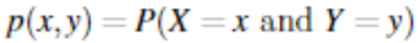
2. **Two Continuous Random Variables**: The joint probability is described by a joint **probability density function (PDF)**, where the probability is calculated by integrating over a specific region in the plane. Then, given that *A* is a two-dimensional set created by continuous random variables *X* and *Y*, the PDF is found by the equation:

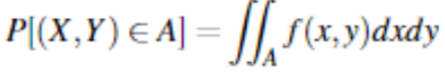

The code below demonstrates the joint probability distribution of two discrete random variables, which, in this case, are two six-sided dice.

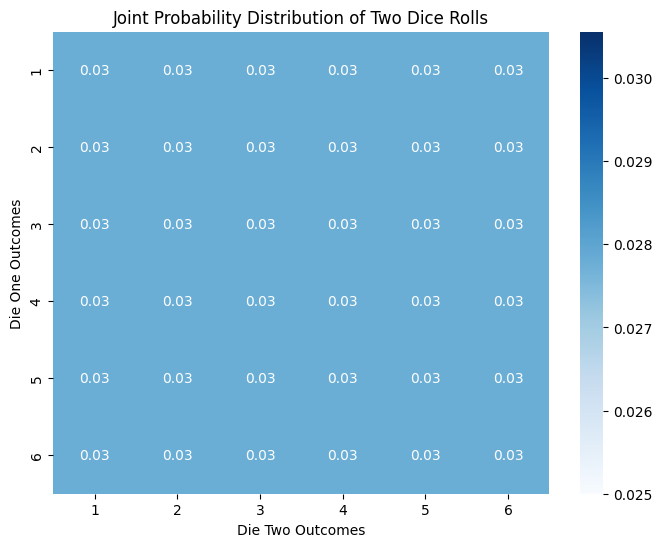

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


die_one_values = np.arange(1, 7)
die_two_values = np.arange(1, 7)

joint_prob = np.zeros((6, 6))

for x in die_one_values:
    for y in die_two_values:
        joint_prob[x-1, y-1] = 1/36

plt.figure(figsize=(8, 6))
sns.heatmap(joint_prob, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=die_two_values, yticklabels=die_one_values)

plt.title('Joint Probability Distribution of Two Dice Rolls')
plt.xlabel('Die Two Outcomes')
plt.ylabel('Die One Outcomes')
plt.show()


Because each combination is equally likely, the heat map of the joint probability is consistent throughout.

# **2.3.2. Correlation and Dependence**
**Correlation** is a statistical measure that describes the strength and direction of a relationship between two variables. It is useful because it can indicate a predictive relationship that can be exploited in practice. **Covariance** is a measure of the joint variability of two random variables, or, in other words, the extent to which two random variables change together.
The figure below demonstrates positive, negative and negligible covariance.

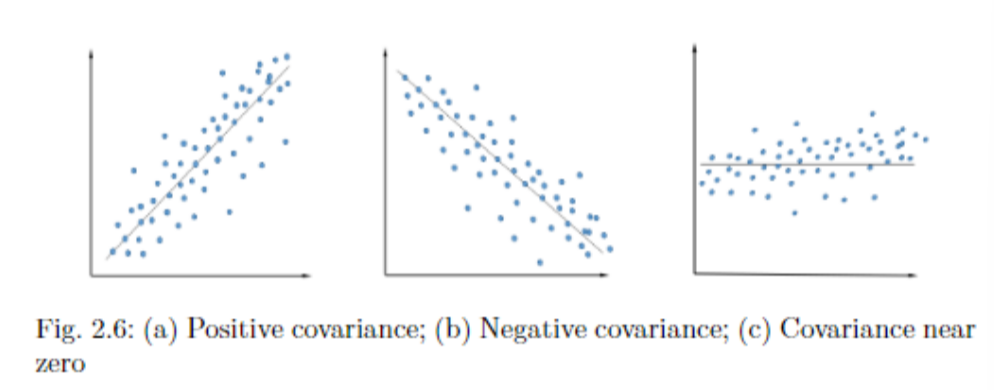

The **correlation coefficient** of two random variables *X* and *Y* is defined by the formula:

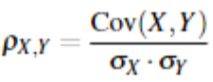

Correlation coefficients have the following properties:
1. If *X* and *Y* are independent, then Corr (*X,Y*) =0, but Corr (*X,Y*) =0 does not imply independence.
2. | Corr(*X,Y*) |≤ 1, Corr(*X,Y*)=1 or -1 if *Y=aX+b* for some numbers *a* and *b* with *a* =/= 0.

The example below calculates the Pearson correlation coefficient within a dataset with two variables, hours studied and test scores, and visualizes the data.

Correlation Coefficient: 0.9900377832939452


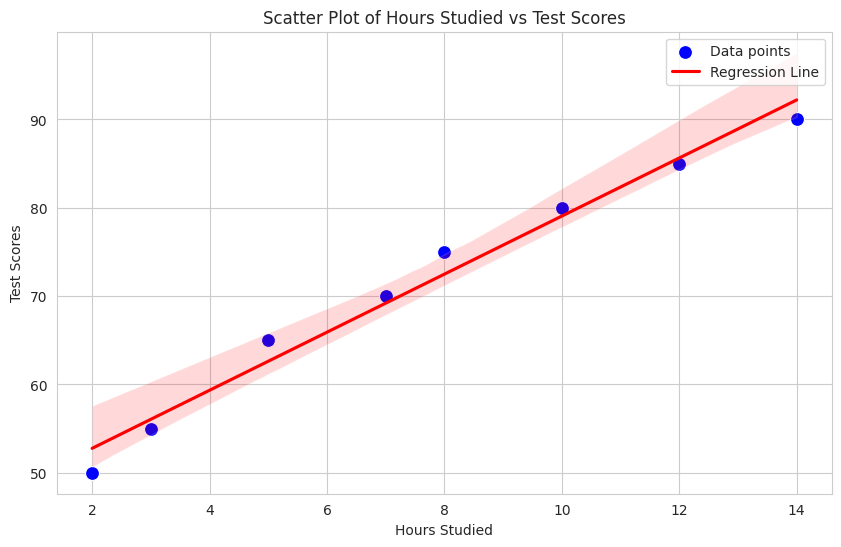

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


X = np.array([2, 3, 5, 7, 8, 10, 12, 14]) #hours studied
Y = np.array([50, 55, 65, 70, 75, 80, 85, 90]) #test scores

# correlation coefficient
correlation_coefficient = np.corrcoef(X, Y)[0, 1]
print("Correlation Coefficient:", correlation_coefficient)


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.scatterplot(x=X, y=Y, color='blue', s=100, label='Data points')

#line of best fit
sns.regplot(x=X, y=Y, scatter=False, color='red', label='Regression Line')

plt.title('Scatter Plot of Hours Studied vs Test Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Test Scores')
plt.legend()
plt.show()



The correlation coefficient of 0.99 is a nearly perfect positive correlation, stating that as one variable increases, the other variable is highly likely to increase as well. Thus, if a student studies more, they are more likely to obtain a higher score on their exam.

# **2.2.3. Random Samples**
A simple random sample is a randomly selected subset of a population and is often used in practice. A set of random samples *X1, X2,...Xn* are said to form a simple random sample of size *n* if:
1. The *Xi*'s are independent random variables.
2. Every *Xi* has the same probability distribution.

The **central limit theorem** (CLT) is a fundamental statistical theorem which states that, under certain conditions, the distribution of the sample means will tend to be normally distributed as the sample size increases, regardless of the shape of the population distribution. It is true under the following conditions:
1. The sample size is largely enough, usually when n is greater than 30.
2. The samples are selected at random.
3. The samples are independent, so that the results of one sample do not affect the results of other samples.
4. The population's distribution has finite variance.

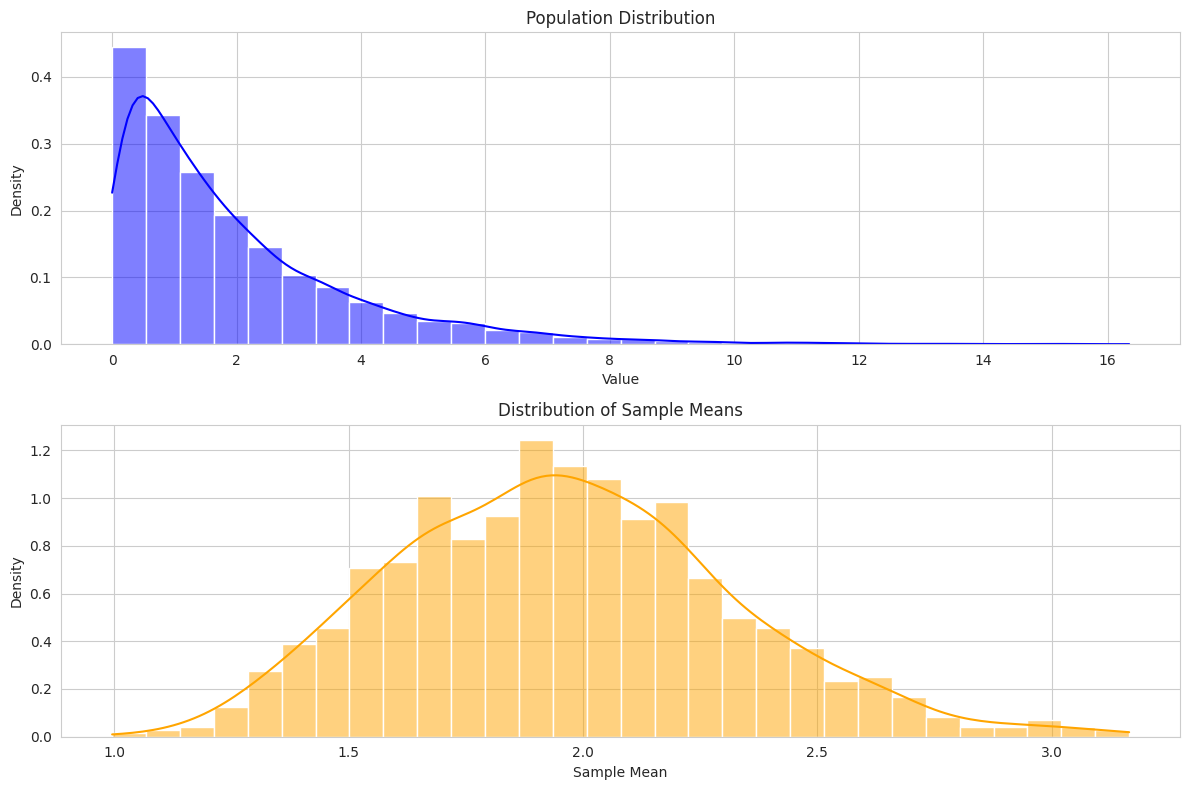

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
population_size = 10000
population_data = np.random.exponential(scale=2.0, size=population_size)
num_samples = 1000  # 1000 samples
sample_size = 30    # 30 data points in each sample

# sample means
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population_data, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))
plt.figure(figsize=(12, 8))

# population distribution
plt.subplot(2, 1, 1)
sns.histplot(population_data, bins=30, kde=True, color='blue', stat='density')
plt.title('Population Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# sample mean distribution
plt.subplot(2, 1, 2)
sns.histplot(sample_means, bins=30, kde=True, color='orange', stat='density')
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')


plt.tight_layout()
plt.show()


Although the population distribution is skewed to the right, the distribution of sample means is normal.